In [57]:
import pandas
from imblearn.under_sampling import RandomUnderSampler
import datetime

In [58]:
FILENAME = '20230706_2e+07'

In [59]:
df = pandas.read_csv(f"../Data/Preprocessed/chartevents_{FILENAME}_labeled.csv", engine='python')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827399 entries, 0 to 827398
Data columns (total 9 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   hadm_id                                827399 non-null  int64  
 1   charttime                              827399 non-null  object 
 2   Heart Rate                             827399 non-null  float64
 3   Respiratory Rate                       827355 non-null  float64
 4   Non Invasive Blood Pressure systolic   821804 non-null  float64
 5   Non Invasive Blood Pressure diastolic  821784 non-null  float64
 6   O2 saturation pulseoxymetry            827360 non-null  float64
 7   Temperature Celsius                    826287 non-null  float64
 8   label                                  827399 non-null  bool   
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 51.3+ MB


In [60]:
mark = ("Heart Rate", \
        "Respiratory Rate", \
        "Non Invasive Blood Pressure systolic", \
        "Non Invasive Blood Pressure diastolic", \
        "O2 saturation pulseoxymetry", \
        "Temperature Celsius")
df.dropna(inplace=True)
df_under, df_under_label = df[list(mark)], df.label

In [61]:
print("Before\t", sum(df_under_label) / len(df_under_label))
df_under_resample, df_under_label_resample = RandomUnderSampler(sampling_strategy='majority').fit_resample(df_under, df_under_label)
print("After \t", sum(df_under_label_resample) / len(df_under_label_resample))

Before	 0.0002814564089817492
After 	 0.5


In [62]:
sum(df_under_label)

231

In [63]:
df_under_resample = (df_under_resample - df_under_resample.mean()) / df_under_resample.std()
# df_under_resample

In [64]:
df_under_resample.sample(5)

,Heart Rate,Respiratory Rate,Non Invasive Blood Pressure systolic,Non Invasive Blood Pressure diastolic,O2 saturation pulseoxymetry,Temperature Celsius
45,-0.231914,-1.089420,0.017353,-0.214341,0.289502,0.108940
361,2.002896,-0.489704,-0.279577,-0.372277,0.289502,0.391032
394,0.021083,-0.789562,-1.335329,-1.109310,-0.911846,0.014909
139,0.569244,-0.039916,1.238066,1.522952,0.289502,0.155955
422,0.021083,0.259942,-0.312569,0.733273,0.289502,0.297001


In [65]:
df_under_resample.std()

Heart Rate                               1.0
Respiratory Rate                         1.0
Non Invasive Blood Pressure systolic     1.0
Non Invasive Blood Pressure diastolic    1.0
O2 saturation pulseoxymetry              1.0
Temperature Celsius                      1.0
dtype: float64

In [66]:
df_under_resample.mean()

Heart Rate                              -1.537971e-17
Respiratory Rate                        -2.460754e-16
Non Invasive Blood Pressure systolic    -1.230377e-16
Non Invasive Blood Pressure diastolic    1.115029e-16
O2 saturation pulseoxymetry             -5.229102e-16
Temperature Celsius                     -9.458523e-16
dtype: float64

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_under_resample, df_under_label_resample, test_size=0.2, stratify=df_under_label_resample)

In [68]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=3)
model = model.fit(X_train, y_train)

[Text(0.5, 0.875, 'x[2] <= -0.725\ngini = 0.5\nsamples = 369\nvalue = [185, 184]'),
 Text(0.25, 0.625, 'x[5] <= 0.121\ngini = 0.236\nsamples = 88\nvalue = [12, 76]'),
 Text(0.125, 0.375, 'x[4] <= 0.34\ngini = 0.065\nsamples = 59\nvalue = [2, 57]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]'),
 Text(0.1875, 0.125, 'gini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.375, 0.375, 'x[2] <= -0.989\ngini = 0.452\nsamples = 29\nvalue = [10, 19]'),
 Text(0.3125, 0.125, 'gini = 0.18\nsamples = 20\nvalue = [2, 18]'),
 Text(0.4375, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.75, 0.625, 'x[0] <= 1.054\ngini = 0.473\nsamples = 281\nvalue = [173, 108]'),
 Text(0.625, 0.375, 'x[5] <= -0.114\ngini = 0.437\nsamples = 245\nvalue = [166, 79]'),
 Text(0.5625, 0.125, 'gini = 0.33\nsamples = 24\nvalue = [5, 19]'),
 Text(0.6875, 0.125, 'gini = 0.396\nsamples = 221\nvalue = [161, 60]'),
 Text(0.875, 0.375, 'x[0] <= 1.687\ngini = 0.313\nsamples = 36\nvalue = [7, 29]'),
 

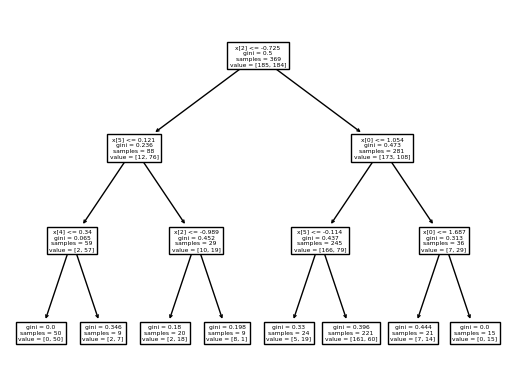

In [69]:
tree.plot_tree(model)

In [70]:
import graphviz
from graphviz import Digraph, Source
features = list(mark)
dot_data = tree.export_graphviz(model, feature_names=features)
graph = Source(dot_data)

In [71]:
len(X_train), len(X_test)

(369, 93)

In [72]:
model.score(X_test, y_test)

0.7204301075268817

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold

In [74]:
scores = 0
for i in range(100):
    scores += cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy').mean()
scores / 100

0.5892631578947367